## Introduction

**Key Notes**
1. Whenever we get a dataset in Machine Learning, we have to divide the columns/features into depend variables and independednt variables.
2. The feature we are predicting becomes the dependent feature or **Response**.
3. When we are comparing 2 features say f1 and f2 (one is dependent and another is independent), then the analysis is called as Bivariate analysis. In this case, we are trying to see how is the relationship between f1 and f2.
4. When we are analyzing just a single feature/column, it is called as univariate analysis.
5. Univariate and Bivariate analysis can be easily done with Seaborn.
6. Even if we have more than 2 features or more than 3 features (multiple features), Seaborn helps us to analyze those features as well.

**Distribution Plots**

1. Distplot
2. Jointplot
3. Pairplot

Note: 
1. Jointplot helps us in doing bivariate analysis. Whenever we want to see relationship between 2 variables in a vizualization way, we make use of jointplots.
2. If we have more than 2 independent features, we will be making use of Pairplots    

In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset("tips")

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- In this dataset, our main aim is to create a model that will predict the Tip will be given based on other features
- Dependent feature - tip
- Independent feature - All other columns

- Seaborn has a property called as *Heatmap* which helps us to find the correlation between each and every feature.
- Corelation means, inter-relation between 2 features. Eg: inter-relation between (total_bill and tip) or (sex and smoker)
- The corelation can be found between 2 features, only when the features are integer or float in nature.
- We cannot find corelation of categorical features.
- Whenever we apply corelation, the value will be between -1 to +1. This is known as Pearsons coefficient Corelation.

In [6]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
# To find the corelation,
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


- The reason we get only 3 corelations is because only 3 features are float or int. Remaining features are categorical in nature.

- From the corelation table, we get to learn the following:
    1. The corelation of total_bill with total_bill is 1 or 100%
    2. The corelation of total_bill with tip is 67% (positive). If the corelation is positive, that means if the total bill increases then tip also increase.
    3. If the corelation is negative, eg if corelation between size and tip is -48% then if the size increases then the tip decreases.


### Viewing Correlation vizually using a HeatMap.

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix(table) between two discrete dimensions or event types. It is very important in feature selection. 

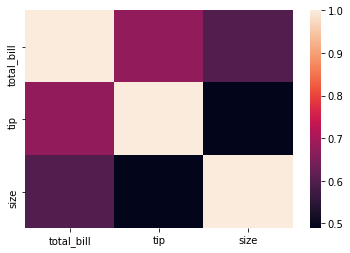

In [8]:
sns.heatmap(df.corr())

- In Heatmap, the colors help us to find the correlation between 2 features. 
- For eg: based on color, the correlation between tip and size is somewhere near 0.5

### Joint Plot

A joint plot allows us to find the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatter plot, a hexbin plot, a 2D Histogram, or a 2D Density plot. 

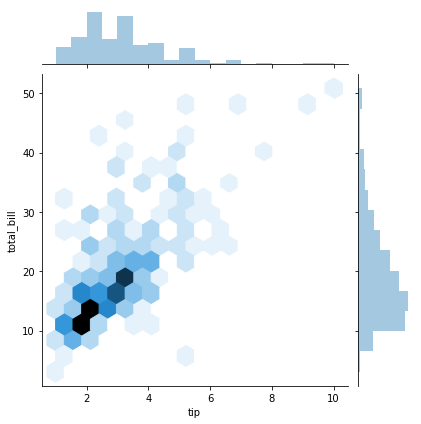

In [9]:
sns.jointplot(x = "tip", y= "total_bill", data = df, kind = "hex")

- From the plot, we can see that the maximum bill is around Dollars 10-20 and the maximum tips are between Dollars 2-4
- Very few bills are around 50 dollars and very few tips are around 10 dollars 

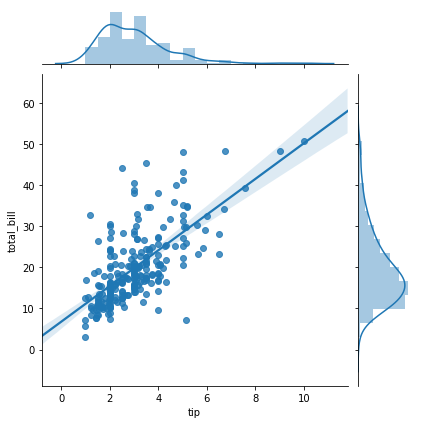

In [10]:
sns.jointplot(x = "tip", y = "total_bill", data = df, kind = "reg")

- The graph has drawn a regression line or the best fit line.

### Pair Plot

- If we have more than 2 features, then in order to find the relationship between all of them with eachother, we will make use of pair plot.
- A pair plot is a scatter plot
- The fetures of the plot have to be an integer value or a floating value.

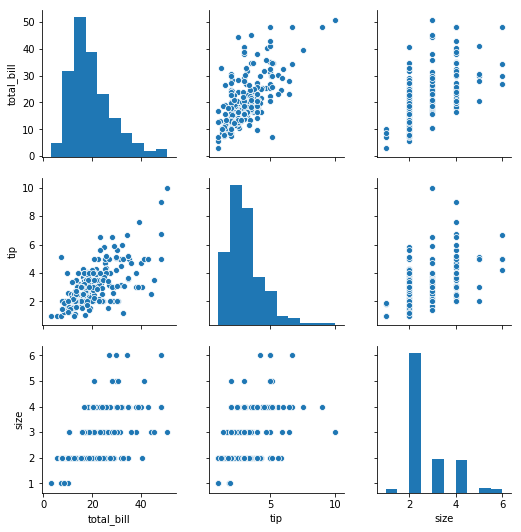

In [11]:
sns.pairplot(df)

- We can further classify the plot using some other feature, for eg: Sex
- For that all we have to do is use Hue = "Sex"

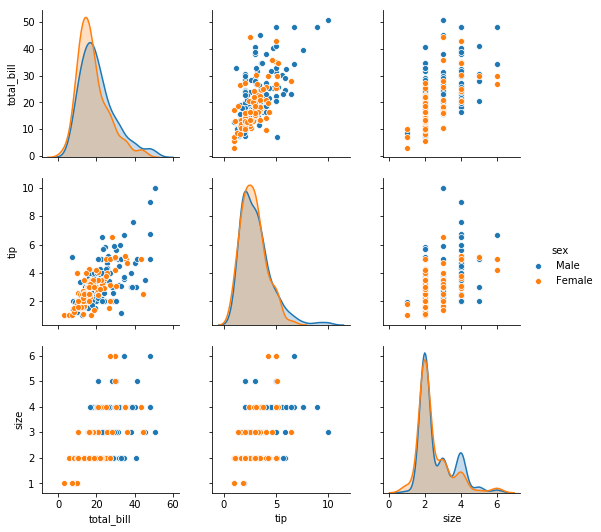

In [13]:
sns.pairplot(df, hue = "sex")

The plot has been further classified into male and female. 

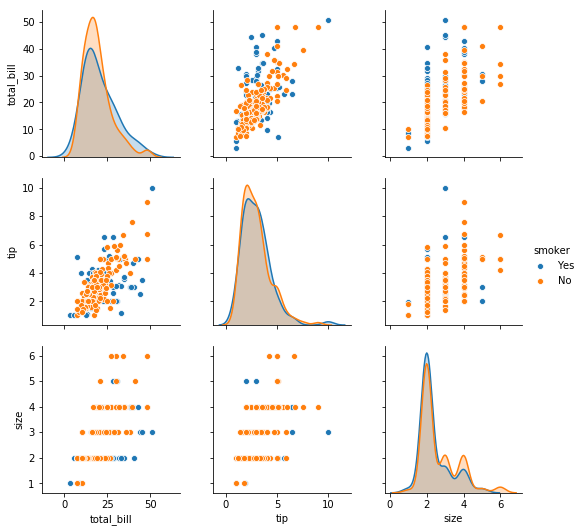

In [14]:
sns.pairplot(df, hue = "smoker")

## Dist Plots

- Dist plot helps us to check the distribution of columns feature in the form of histogram

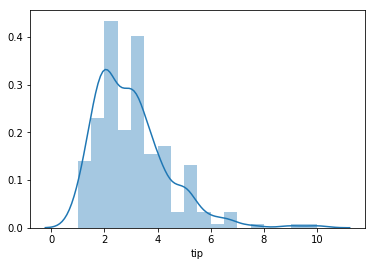

In [15]:
sns.distplot(df["tip"])

- By default, kde = True. Hence the plot is displayed in terms of "density"
- If kde = False, then it will show us the count on y-axis
- kde: kernel density estimation

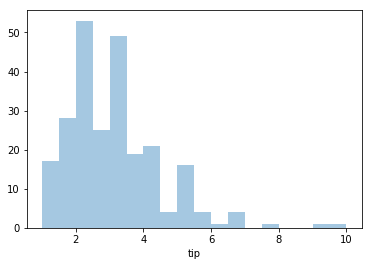

In [17]:
sns.distplot(df["tip"], kde = False)

## Categorical Plots

Seaborn also helps us in doing the analytics on Categorical Data points. The plots used for Categorical data are
1. boxplot
2. countplot
3. bar plot

**Count Plot**
- Show the counts of observations in each categorical bin using bars.
- Counts the number of observations of each class present in a feature and represents it as a histogram.
- We can only provide any one of x-axis value OR y-axis value. The other axis value is always a count. 

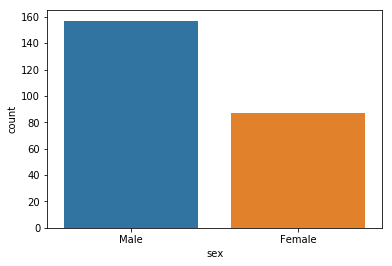

In [24]:
sns.countplot(df["sex"])

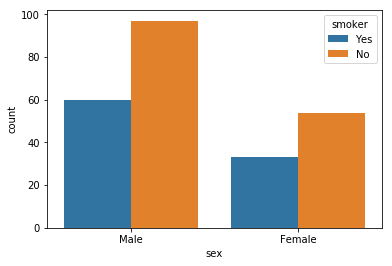

In [25]:
#countplot
sns.countplot(df["sex"], hue = df["smoker"])

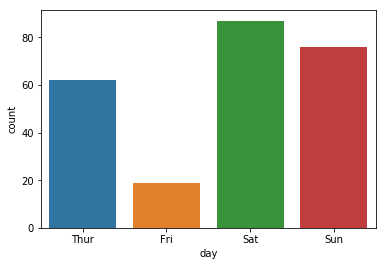

In [26]:
sns.countplot(df["day"])

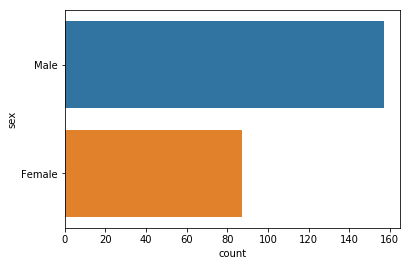

In [27]:
# Countplot in horizontal direction:
sns.countplot(y = df["sex"])

### Barplot
- A barplot displays the same way as a countplot, but in barplot we have to provide the x-axis and y-axis value.

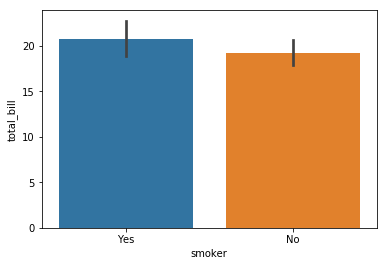

In [34]:
sns.barplot(y = "total_bill", x= "smoker", data = df)

- Atleast one of the axis values, either x or y have to be a numerical value.
- For vertical plot, the categorical value needs to be on x-axis
- For horizontal plot, the categorical value needs to be on y-axis

### Boxplot:

- A box and whisker plot(sometimes knows as boxplot) is a graph that presents information from a five number summary.

In [35]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

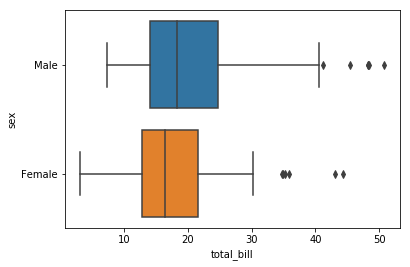

In [41]:
sns.boxplot(x = "total_bill", y = "sex", data = df)

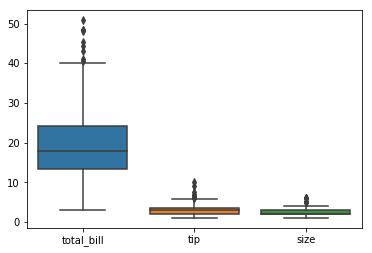

In [43]:
sns.boxplot(data = df) # Displays only numerical features

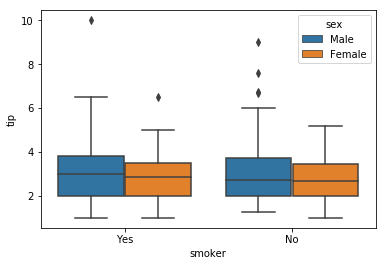

In [44]:
sns.boxplot(x = "smoker", y = "tip", hue = "sex", data = df)

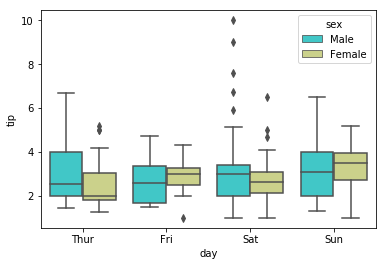

In [46]:
sns.boxplot(x = "day", y = "tip", hue = "sex", data = df, palette = "rainbow")